# Efecto de los polos adicionales y de los ceros

Hasta ahora hemos estudiado el comportamiento de los sistemas de segundo orden. Ahora estudiaremos como afectan a la respuesta temporal agregar un cero o un polo.

Estudiemos el siguiente caso, tenemos una función de transferencia de la siguiente forma:

$$G_1=\frac{2}{(s+1)(s+2)}$$

Separando en fracciones simples queda:

$$G_1=\frac{2}{s+1}-\frac{2}{s+2}$$

Vemos que ambas exponenciales tienen una amplitud similar.

Agreguemos un cero en -1.1. La función de transferencia quedará de la forma:

$$G_1=\frac{2(s+1.1)}{1.1(s+1)(s+2)}$$

Y separando en fracciones simples nos queda:

$$G_1=\frac{0.18}{s+1}+\frac{1.64}{s+2}$$

Como vemos, la exponencial más rápida disminuyó su amplitud en más de 10 veces.

Hagamos un análisis más detallado:

Tengamos en cuenta la función de transferencia normalizada de la siguiente manera:

Observemos que el cero lo agregamos a un factor $\alpha$ con respecto a la parte real de los polos complejos conjugados: $s = -\alpha\zeta\omega_n = -\alpha\sigma$

## Efecto Cero adicional

:::{figure-md}
<img style="display:block; margin-left: auto; margin-right: auto;" src="fig6.png" width="400" alt="respuesta">

Respuestas al escalón de  $G(s)=\dfrac{\dfrac{s}{\alpha\zeta\omega_n}+1}{(s/\omega_n)^2 + 2\zeta(s/\omega_n)}$ para $\zeta = 0.5$ y para distintos valores de $\alpha$
:::

:::{figure-md}
<img style="display:block; margin-left: auto; margin-right: auto;" src="fig7.png" width="400" alt="Sobrepico">

Sobrepico en función de $\alpha$ y $\zeta$

:::

Si queremos analizar como se comporta con el cero sobre el eje real positivo (se lo llama cero de no minima fase):

De la figura concluímos que a medida que el cero se acerca al valor de la parte real de los polos, el sobrepico aumenta. En la figura anterior. vemos como aumenta el sobrepico al disminuir el valor de $\alpha$ para distintos valores de $\zeta$ . De la misma podemos afirmar que el valor del sobrepico no es muy afectado por el cero si el mismo se encuentra más allá de un factor 4 de la parte real de los polos complejos conjugados.

Si escribimos la función de transferencia de la siguiente manera:

$$G(s)=\dfrac{1}{s^2+2\zeta s+1}+\dfrac{1}{\alpha\zeta}\dfrac{s}{s^2+2\zeta s+1}$$

Notamos que el primer término es la función de transferencia original (sin el cero), y el segundo término es la derivada de la función de transferencia original afectada por una constante $\dfrac{1}{\alpha\zeta}$. Por lo tanto, la respuesta a un escalón de la función de transferencia $G(s)$ será la respuesta a un escalón de la función de transferencia sin el cero, más la derivada de esa respuesta por la constante. De esta manera podemos explicar la presencia de un sobrepico mayor. En la figura siguiente muestra la respuesta a un escalón para el sistema original, su derivada y la suma de ambas (respuesta al sistema con el cero).

:::{figure-md}
<img style="display:block; margin-left: auto; margin-right: auto;" src="fig8.png" width="400" alt="Sobrepico">

Respuesta del sistema original, su derivada y la suma de ambas
:::

Para el caso de un cero en el semiplano derecho, debemos considerar $\alpha < 0$, y sigue valiendo el mismo análisis. La próxima figura, mostramos la evolución de la respuesta a un escalón del sistema original, su derivada cambiada de signo y la respuesta del sistema con un cero en el semiplano derecho (un cero de no mínima fase). De esta figura observamos que la
respuesta al escalón puede comenzar en sentido contrario a la referencia y luego se corrige.

:::{figure-md}
<img style="display:block; margin-left: auto; margin-right: auto;" src="fig9.png" width="400" alt="Sobrepico">

Respuesta a un escalón del sistema original, su derivada cambiada de signo y la suma de ambas.
:::

En la siguiente celda, al ejecutarla, se muestra una figura interactiva donde se puede cambiar el valor del $\alpha$ y ver como afecta la respuesta temporal, el cero adicional. En rojo punteado se grafica la salida del sistema de orden 2 puro.

**Nota importante:** es necesario instalar el paquete ipywidgets, y es posible que no funciones en Jupyter Lab, si no aparecen los "slider bar" para modificar el $\alpha$ buscar la solución en la web, o abrir el notebook en Jupyter notebook donde debería funcionar correctamente.

interactive(children=(FloatSlider(value=1.0, description='alpha', max=50.0, min=-20.01), FloatSlider(value=1.0…

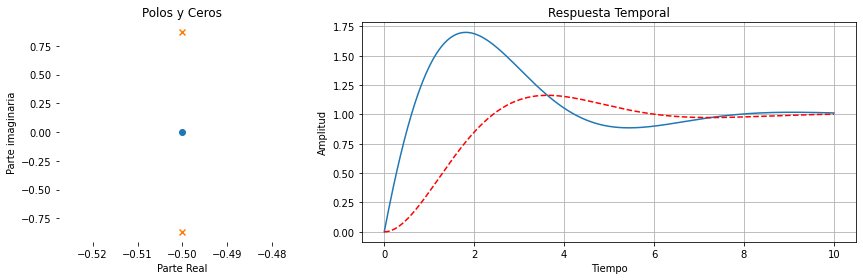

In [1]:
#Orden 2 + Cero adicional
from ipywidgets import interact
import control as ctrl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
%matplotlib inline

def draw_figure(poleG,zeroG,t,y,yord2):
    
    fig = plt.figure(figsize=(12,4))
    gs = gridspec.GridSpec(1, 2, height_ratios=[1], width_ratios=[1,2])
    
    ax1 = fig.add_subplot(gs[0])
    ax2 = fig.add_subplot(gs[1])

    ax1.set_title("Polos y Ceros")
    ax1.set_xlabel("Parte Real")
    ax1.set_ylabel("Parte imaginaria")
    ax1.spines['left'].set_color('none')
    ax1.spines['right'].set_color('none')
    ax1.spines['top'].set_color('none')
    ax1.spines['bottom'].set_color('none')

    ax2.set_title("Respuesta Temporal")
    ax2.set_xlabel("Tiempo")
    ax2.set_ylabel("Amplitud")
    fig.tight_layout()
    
    ax1.scatter(np.real(zeroG), np.imag(zeroG), marker='o')
    ax1.scatter(np.real(poleG), np.imag(poleG), marker='x')
    ax2.plot(t,y)
    ax2.plot(t,yord2,'--r')
    ax2.grid()


def update(alpha=1, wn=1, zeta=0.5,tmax=10):
    G=ctrl.tf([1/wn/alpha/zeta,1],[1/wn**2,2*zeta/wn,1])
    Gord2=ctrl.tf([1],[1/wn**2,2*zeta/wn,1])
    alpha=0.001 if alpha==0 else alpha
    t=np.linspace(0,tmax,501)
    _,y=ctrl.step_response(G,T=t)
    _,yord2=ctrl.step_response(Gord2,T=t)
    polesG=G.pole()
    zeroG=G.zero()
    draw_figure(polesG,zeroG,t,y,yord2)
    
interact(update, alpha=(-20.01,50,0.1),wn=(0.01,10,0.1),zeta=(0.001,1.01,0.02),tmax=(1, 20));

### Efecto Polo Adicional

Analicemos ahora el caso de agregar un polo. Escribamos la función de transferencia de la siguiente forma:

$$G(s)=\dfrac{1}{\left(\dfrac{s}{\alpha\zeta\omega_n}+1\right)\left[\left(\dfrac{s}{\omega_n}\right)^2+2\zeta\left(\dfrac{s}{\omega_n}\right)+1\right]}, \text{para } \zeta = 0.5, \alpha = 1, 2, 5 ,100, \infty$$

:::{figure-md}
<img style="display:block; margin-left: auto; margin-right: auto;" src="fig10.png" width="400" alt="Sobrepico">

Respuesta a un escalón para el sistema $G(s) \text{ para } \zeta = 0.5, \alpha = 1, 2, 5 ,100, \infty$

:::

Como podemos observar de la figura, la presencia de un polo adicional afecta sensiblemente al tiempo de crecimiento, y el mismo se hace más grande cuanto el polo adicional se acerca más al origen.

En la figura que sigue muestra el comportamiento del tiempo de crecimiento en función del valor de a parametrizada con $\zeta$. Del mismo podemos inferir que si el polo adicional está más lejos que 4 veces la parte real de los polos complejos conjugados, el tiempo de crecimiento no es prácticamente afectado.

:::{figure-md}
<img style="display:block; margin-left: auto; margin-right: auto;" src="fig11.png" width="400" alt="Sobrepico">

Tiempo de crecimiento en función de a, para $\zeta$ = 0.5, 0.7 y 1.0
:::

En la siguiente celda, al ejecutarla, se muestra una figura interactiva donde se puede cambiar el valor del $\alpha$ y ver como afecta la respuesta temporal la ubicación del polo adicional. En rojo punteado se grafica la salida del sistema de orden 2 puro.

**Nota importante:** es necesario instalar el paquete ipywidgets, y es posible que no funciones en Jupyter Lab, si no aparecen los "slider bar" para modificar el $\alpha$ buscar la solución en la web, o abrir el notebook en Jupyter notebook donde debería funcionar correctamente.

interactive(children=(FloatSlider(value=1.0, description='alpha', max=50.0, min=-20.01), FloatSlider(value=1.0…

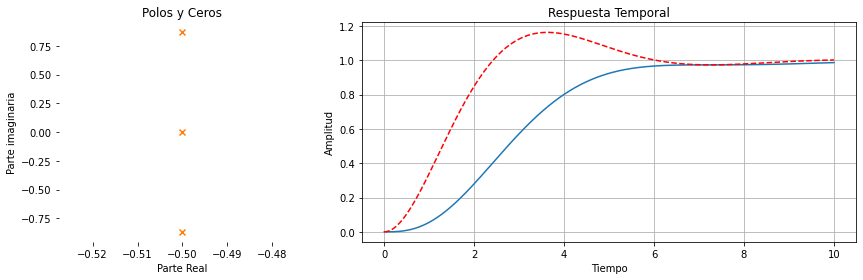

In [2]:
#Orden 2 + Polo adicional 
from ipywidgets import interact
import control as ctrl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
%matplotlib inline

def draw_figure(poleG,zeroG,t,y,yord2):
    
    fig = plt.figure(figsize=(12,4))
    gs = gridspec.GridSpec(1, 2, height_ratios=[1], width_ratios=[1,2])
    
    ax1 = fig.add_subplot(gs[0])
    ax2 = fig.add_subplot(gs[1])

    ax1.set_title("Polos y Ceros")
    ax1.set_xlabel("Parte Real")
    ax1.set_ylabel("Parte imaginaria")
    ax1.spines['left'].set_color('none')
    ax1.spines['right'].set_color('none')
    ax1.spines['top'].set_color('none')
    ax1.spines['bottom'].set_color('none')

    ax2.set_title("Respuesta Temporal")
    ax2.set_xlabel("Tiempo")
    ax2.set_ylabel("Amplitud")
    fig.tight_layout()
    
    ax1.scatter(np.real(zeroG), np.imag(zeroG), marker='o')
    ax1.scatter(np.real(poleG), np.imag(poleG), marker='x')
    ax2.plot(t,y)
    ax2.plot(t,yord2,'--r')
    ax2.grid()


def update(alpha=1, wn=1, zeta=0.5,tmax=10):
    G=ctrl.tf(1,[1/wn/alpha/zeta,1])*ctrl.tf(1,[1/wn**2,2*zeta/wn,1])
    Gord2=ctrl.tf([1],[1/wn**2,2*zeta/wn,1])
    alpha=0.001 if alpha==0 else alpha
    t=np.linspace(0,tmax,501)
    _,y=ctrl.step_response(G,T=t)
    _,yord2=ctrl.step_response(Gord2,T=t)
    polesG=G.pole()
    zeroG=G.zero()
    draw_figure(polesG,zeroG,t,y,yord2)
    
interact(update, alpha=(-20.01,50,0.1),wn=(0.01,10,0.1),zeta=(0.001,1.01,0.02),tmax=(1, 20));